#    Exploratory Data Analysis (EDA) and Machine Learning Model Applications of Telco-Customer Dataset

<a id=section101></a> 
### 1. Introduction

<a id=section2></a> 
### 2. Load the packages and data 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")
import lux

<a id=section3></a> 
### 3. Data Profiling

In [2]:
# Read Dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# Review the data types and sample data to understand what variables we are dealing with?
# Which variables need to be transformed in some way before they can be analyzed?
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# DataFrame has 5 rows and 21 columns

In [5]:
df.isnull().sum() # Display the sum of null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [6]:
df.info() # Display the data type for each variable

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.dtypes # Display the data type for each variable

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [8]:
df.describe()  # Descriptive statistics for the numerical variables

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [9]:
df.describe().T

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### 4. Observations

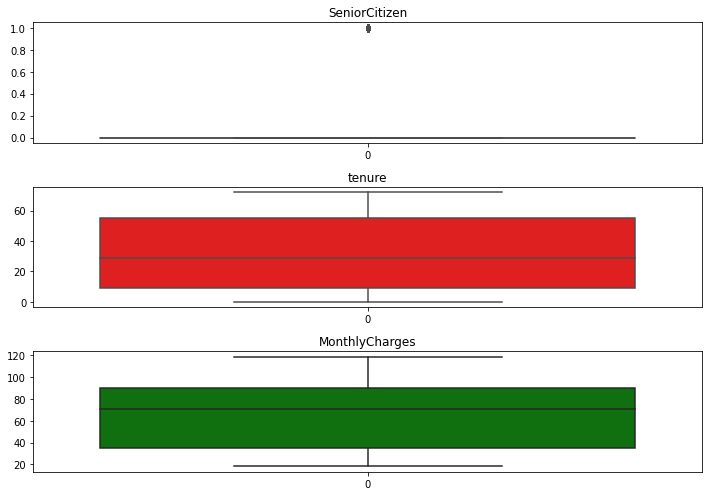

In [10]:
fig, ax = plt.subplots(3, 1, figsize=(10,7))
ax[0].set_title("SeniorCitizen")
ax[1].set_title("tenure")
ax[2].set_title("MonthlyCharges")
sns.boxplot(data = df.SeniorCitizen, orient="v", ax=ax[0], color = "b")
sns.boxplot(data = df.tenure, orient="v", ax=ax[1], color = "r")
sns.boxplot(data = df.MonthlyCharges, orient="v", ax=ax[2], color = "g")
plt.tight_layout()

In [11]:
for i in df.columns:
    print(df[i].value_counts())
    print("---------------------------------------------------------------------------------------------")
    

0363-SVHYR    1
8469-SNFFH    1
5136-GFPMB    1
3671-SHRSP    1
4608-LCIMN    1
             ..
1135-HIORI    1
1932-UEDCX    1
7718-RXDGG    1
4851-BQDNX    1
1986-PHGZF    1
Name: customerID, Length: 7043, dtype: int64
---------------------------------------------------------------------------------------------
Male      3555
Female    3488
Name: gender, dtype: int64
---------------------------------------------------------------------------------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
---------------------------------------------------------------------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
---------------------------------------------------------------------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
---------------------------------------------------------------------------------------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
3

<a id=section307></a> 
### 5. Data Processing 

- Variables to transform prior to analysis:
    - Standardize all column headers to lower case (to prevent typos!)
    - Resolve duplicate records
    - Split Combination of multiple columns
    - We will need to decide how to handle Null values.
    

   <a id=section403></a>
   
   
   
   ### 5.1. Missing data and its imputation

In [12]:
df = df.drop(labels="customerID", axis=1)

In [13]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
# df[["TotalCharges"]] = df[["TotalCharges"]].apply(pd.to_numeric)
# Although there are numeric values in the total charges column, it appears as an object.

In [15]:
a = df[df["TotalCharges"] == " "].index
a

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [16]:
df.drop(index = a, inplace = True)

In [17]:
df[["TotalCharges"]] = df[["TotalCharges"]].apply(pd.to_numeric)

In [18]:
X = df.drop(["Churn"], axis=1)
y = pd.DataFrame(df["Churn"], columns = ["Churn"])

In [19]:
X = pd.get_dummies(X, drop_first=True)

In [20]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [21]:
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [22]:
df = pd.concat([X,y], axis=1)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,No
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,No
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,Yes
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,No
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,Yes


In [23]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   uint8  
 5   Partner_Yes                            7032 non-null   uint8  
 6   Dependents_Yes                         7032 non-null   uint8  
 7   PhoneService_Yes                       7032 non-null   uint8  
 8   MultipleLines_No phone service         7032 non-null   uint8  
 9   MultipleLines_Yes                      7032 non-null   uint8  
 10  InternetService_Fiber optic            7032 non-null   uint8  
 11  Inte

<AxesSubplot:>

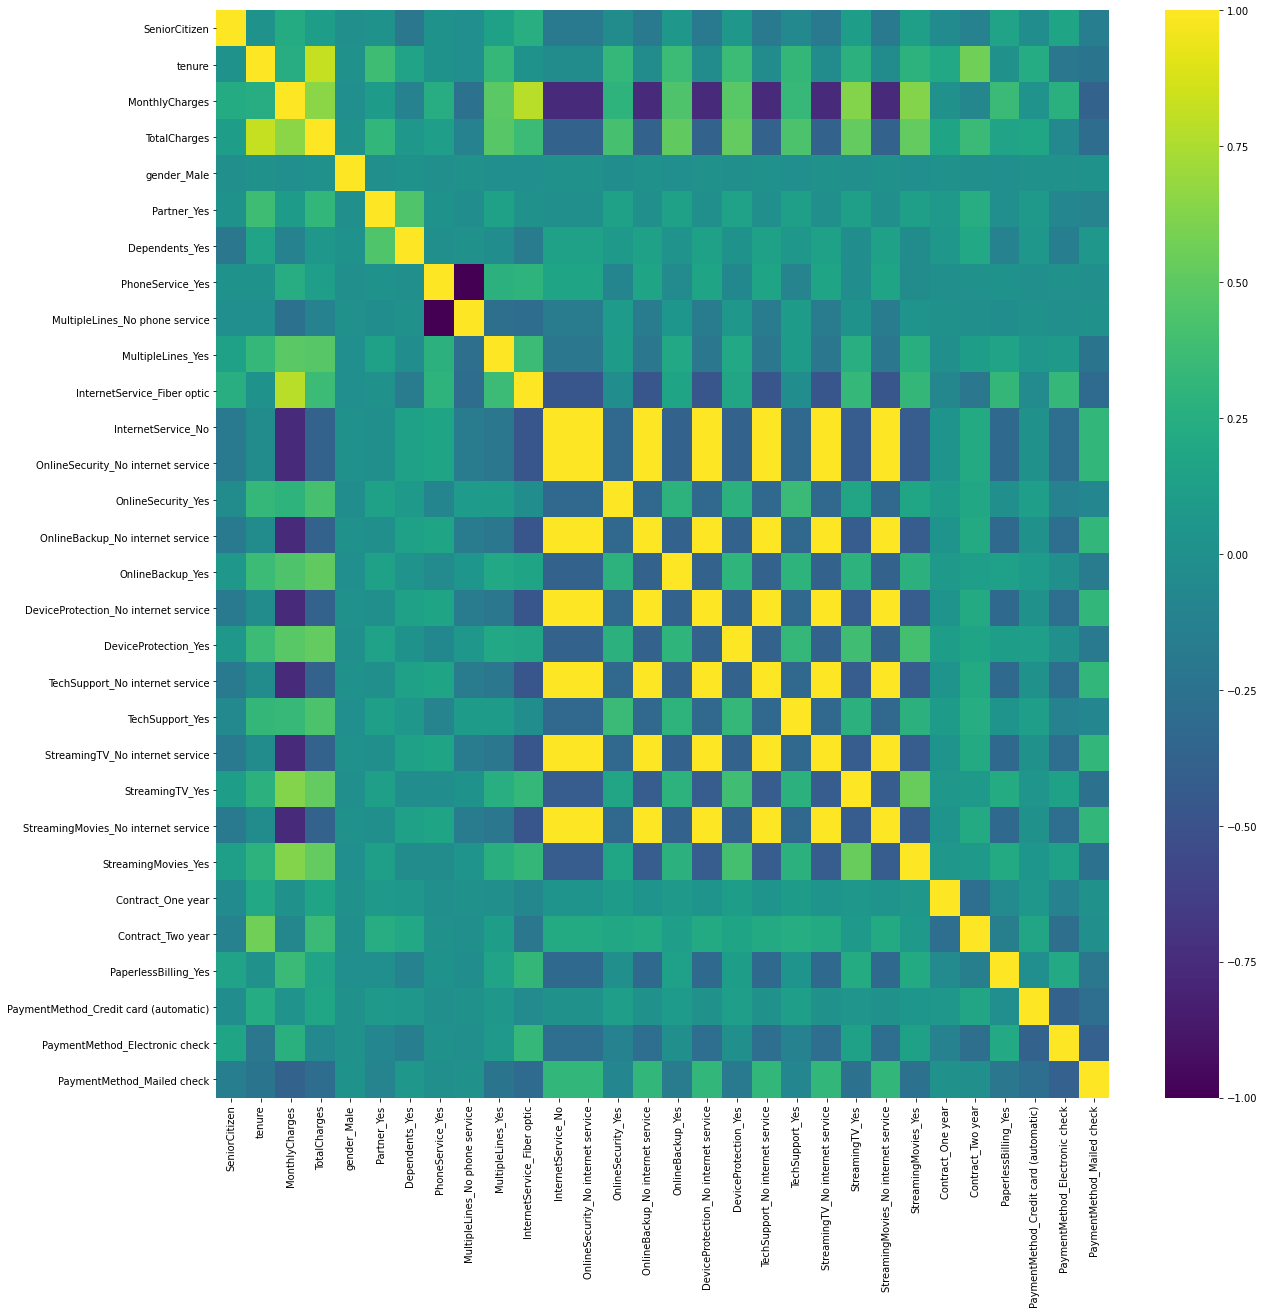

In [24]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = False, cmap = "viridis")

In [25]:
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

In [26]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


In [27]:
df.corr()["Churn"].sort_values()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:>

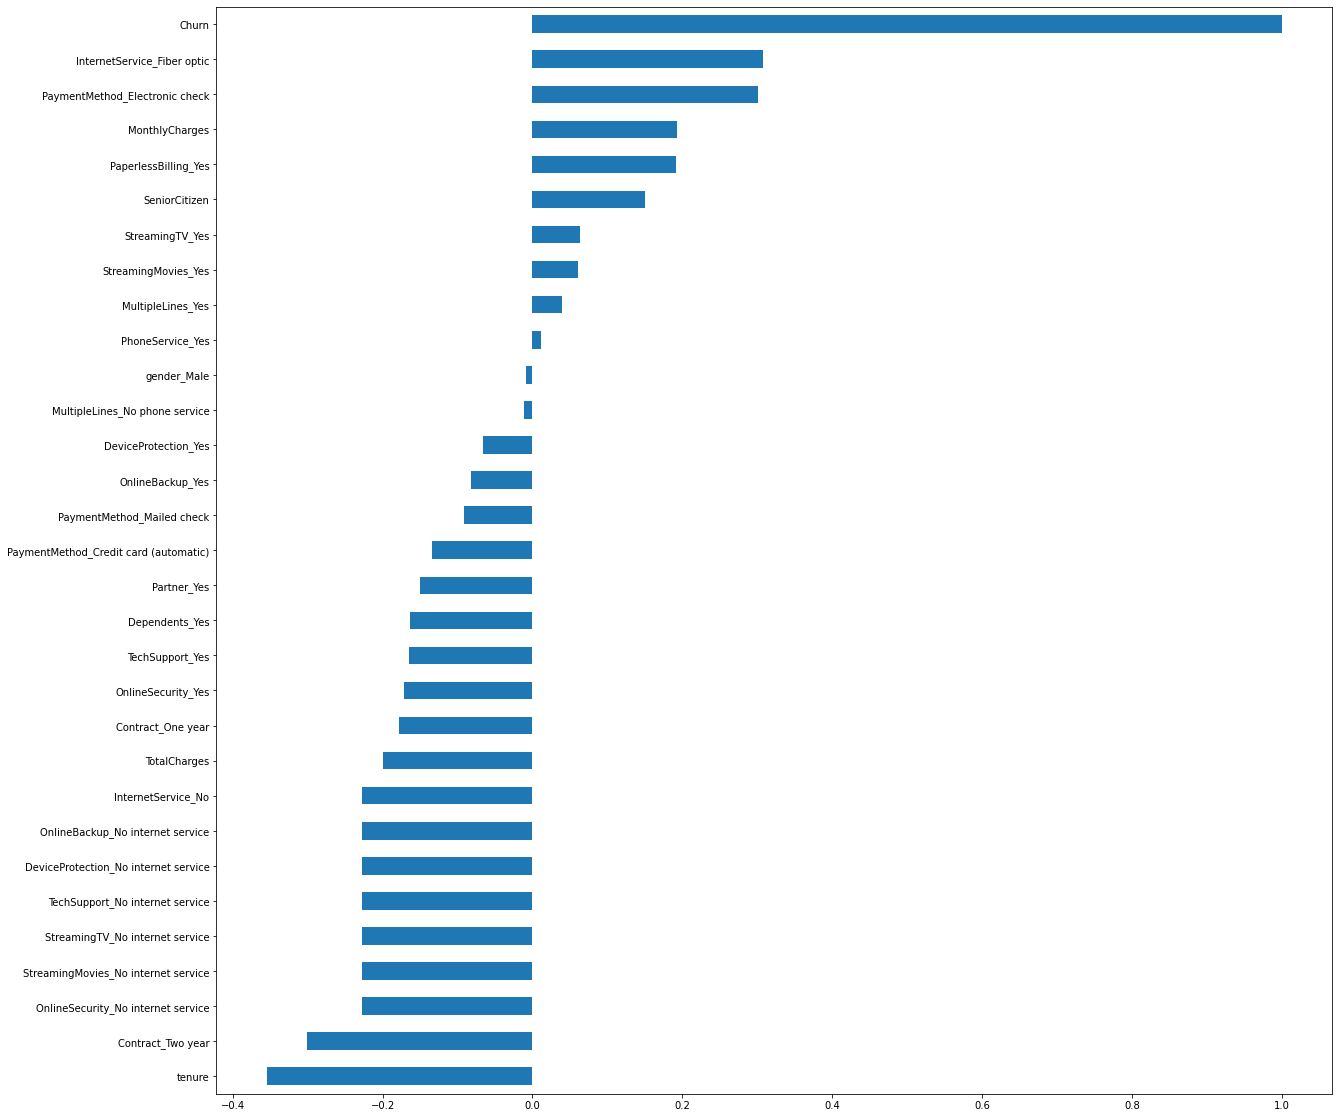

In [28]:
plt.figure(figsize = (20,20))
df.corr()["Churn"].sort_values().plot.barh()

# Machine Learning Model

## Random Forest

In [29]:
X = df.drop(["Churn"], axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

rf_model=RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[925 108]
 [184 190]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



## Random forest tune

In [30]:
rf=RandomForestClassifier()
rf_params = {"n_estimators":[50]}
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2)
rf_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.4s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [50]}, verbose=2)

In [31]:
rf=RandomForestClassifier()
rf_params = {"n_estimators":[50, 100, 300], 'max_depth':[3,5,7],'max_features': [2,4,6,8],'min_samples_split': [2,4,6]}
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  2.2min finished


In [32]:
rf = RandomForestClassifier()
rf_params = {"n_estimators":[50, 100, 300],
             "max_depth":[3,7],
             "max_features": [2,6,8],
             "min_samples_split": [2,4,6]}

rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)



Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.3min finished


In [33]:
rf_cv_model.best_params_

{'max_depth': 7, 'max_features': 6, 'min_samples_split': 6, 'n_estimators': 50}

In [34]:
rf_tuned = RandomForestClassifier(max_depth = 7, max_features = 8, min_samples_split = 2, n_estimators = 300).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[931 102]
 [194 180]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [75]:
rf_tuned = RandomForestClassifier(max_depth = 1, max_features = "sqrt", min_samples_split = 2, n_estimators = 1000).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1291    0]
 [ 467    0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1291
           1       0.00      0.00      0.00       467

    accuracy                           0.73      1758
   macro avg       0.37      0.50      0.42      1758
weighted avg       0.54      0.73      0.62      1758



In [35]:
rf_tuned = RandomForestClassifier(max_depth = 7, max_features = 8, min_samples_split = 2, n_estimators = 400).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[930 103]
 [197 177]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



## XGBOOST

In [36]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[21:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[890 143]
 [181 193]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1033
           1       0.57      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.77      1407



## Tuning XGBoost

In [37]:
xgb = XGBClassifier()
xgb_params = {"n_estimators": [50, 100, 300], "subsample":[0.5,0.8,1], "max_depth":[3,5,7], "learning_rate":[0.1,0.01,0.3]}
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 3, n_jobs = -1, verbose = 2).fit(X_train, y_train)

xgb_cv_model.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  1.9min finished


[21:50:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.5}

In [38]:
xgb_tuned = XGBClassifier(learning_rate= 0.01, max_depth= 5, n_estimators= 450, subsample= 0.5).fit(X_train, y_train)

y_pred = xgb_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[21:50:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[919 114]
 [176 198]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



## Support Vector Classifier

[[923 110]
 [190 184]]


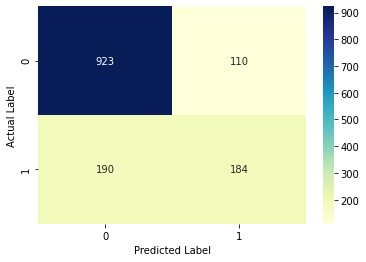

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)
svc_model_sc = SVC().fit(X_train_s, y_train)
y_pred = svc_model_sc.predict(X_test_s)

cnf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.734, total=   1.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.734, total=   1.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.734, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.734, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.734, total=   1.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.785, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.816, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.780, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.764, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.788, total=   0.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.822, total=   0.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.804, total=   0.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.788, total=   0.8s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.801, total=   0.8s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.780, total=   0.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.822, total=   0.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.786, total=   1.6s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.801, total=   1.6s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.780, total=   0.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.820, total=   0.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.803, total=   0.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.780, total=   0.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.810, total=   0.8s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  3.2min finished


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.001)
[[929 104]
 [186 188]]


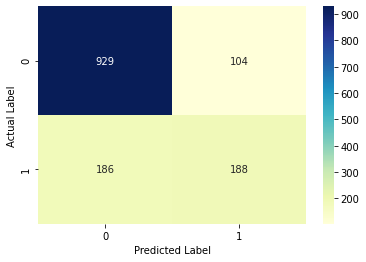

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



In [40]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
svc_tuned = GridSearchCV(SVC(),param_grid, verbose=3, refit=True)
svc_tuned.fit(X_train_s, y_train)
print(svc_tuned.best_params_)
print(svc_tuned.best_estimator_)
y_pred = svc_tuned.predict(X_test_s)
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
print(classification_report(y_test,y_pred))

## Logistic Regression

In [41]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[916 117]
 [166 208]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)
log_model_sc = LogisticRegression()
log_model_sc.fit(X_train_s, y_train)
y_pred = log_model_sc.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1149  142]
 [ 198  269]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.65      0.58      0.61       467

    accuracy                           0.81      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758



## KNN

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)
knn_model_sc = KNeighborsClassifier(n_neighbors=1).fit(X_train_s, y_train)

y_pred = knn_model_sc.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1228  321]
 [ 286  275]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1549
           1       0.46      0.49      0.48       561

    accuracy                           0.71      2110
   macro avg       0.64      0.64      0.64      2110
weighted avg       0.72      0.71      0.72      2110



Text(0, 0.5, 'Error Rate')

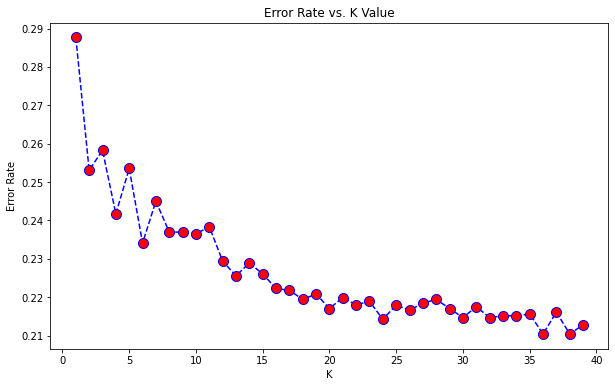

In [44]:
error_rate = []
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train_s, y_train)
    y_pred_i = model.predict(X_test_s)
    error_rate.append(np.mean(y_pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)
knn_model_sc_tuned = KNeighborsClassifier(n_neighbors=38).fit(X_train_s, y_train)

y_pred = knn_model_sc_tuned.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1107  184]
 [ 191  276]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1291
           1       0.60      0.59      0.60       467

    accuracy                           0.79      1758
   macro avg       0.73      0.72      0.73      1758
weighted avg       0.79      0.79      0.79      1758



In [48]:
import sweetviz
import pandas as pd
train = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
test = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
my_report = sweetviz.compare([train, "Train"], [test, "Test"], "Churn")
my_report.show_html("Report.html") # Not providing a filename will default to SWEETVIZ_REPORT.html


Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [47]:
!pip install sweetviz

In [ ]:
modeller = [
    rf_model,
    rf_tuned,
    xgb_model,
    xgb_tuned,
    svc_model_sc,
    svc_tuned,
    log_model,
    log_model_sc,
    knn_model_sc,
    knn_model_sc_tuned
]
sonuc = []
sonuclar = pd.DataFrame(columns= ["Modeller","f1"])
for model in modeller:
    isimler = model.__class__.__name__
    if model in ["knn", "svc"]:
        y_perd = model.predict(X_test_s)
        
    else:
        y_pred = model.predict(X_test)
    
    f1 = f1_score(y_test, y_pred)
    sonuc = pd.DataFrame([[isimler, f1*100]], columns= ["Modeller","f1"])
    sonuclar = sonuclar.append(sonuc)

In [ ]:
sns.barplot(x= 'f1', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('f1 %')
plt.title('Modellerin Doğruluk Oranları');

# SMOOTE

In [53]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [54]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4922, 30)
Number transactions y_train dataset:  (4922,)
Number transactions X_test dataset:  (2110, 30)
Number transactions y_test dataset:  (2110,)


In [55]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1314
Before OverSampling, counts of label '0': 3608 

After OverSampling, the shape of train_X: (7216, 30)
After OverSampling, the shape of train_y: (7216,) 

After OverSampling, counts of label '1': 3608
After OverSampling, counts of label '0': 3608


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    3.4s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    5.4s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train_s, y_train.ravel())

log_model_sc_smote = LogisticRegression()
log_model_sc_smote.fit(X_train_res, y_train_res)
y_pred = log_model_sc_smote.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[924 367]
 [ 93 374]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1291
           1       0.50      0.80      0.62       467

    accuracy                           0.74      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.80      0.74      0.75      1758



In [67]:
rf_tuned = RandomForestClassifier(  max_features='sqrt',
                                    max_depth = 30, 
                                    #max_features = 8, 
                                    min_samples_leaf = 4,
                                    min_samples_split = 3, 
                                    n_estimators = 1000)
rf_tuned.fit(X_train_res, y_train_res)
y_pred = rf_tuned.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1035  256]
 [ 137  330]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1291
           1       0.56      0.71      0.63       467

    accuracy                           0.78      1758
   macro avg       0.72      0.75      0.73      1758
weighted avg       0.80      0.78      0.78      1758



In [77]:
rf_tuned = RandomForestClassifier(  max_features='sqrt',
                                    max_depth = 5, 
                                    #max_features = 8, 
                                    min_samples_leaf = 4,
                                    min_samples_split = 3, 
                                    n_estimators = 300)
rf_tuned.fit(X_train_res, y_train_res)
y_pred = rf_tuned.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[942 349]
 [102 365]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1291
           1       0.51      0.78      0.62       467

    accuracy                           0.74      1758
   macro avg       0.71      0.76      0.71      1758
weighted avg       0.80      0.74      0.76      1758



# Lazy Predict

In [50]:
pip install lazypredict

In [51]:
import lazypredict

In [79]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [90]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, predictions=True)
models,predictions = clf.fit(X_train_res, X_test_s, y_train_res, y_test )


 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [00:26<00:03,  1.27s/it]

[22:47:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:27<00:00,  1.10it/s]


In [91]:
models

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [92]:
predictions

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [83]:
!pip install importlib_metadata

In [85]:
!pip install "importlib_metadata==1.5.2"

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 2.0.0
    Uninstalling importlib-metadata-2.0.0:
      Successfully uninstalled importlib-metadata-2.0.0


In [93]:
import pickle


In [94]:
# Save the Modle to file in the current working directory

with open("my_model.pkl", 'wb') as file:  
    pickle.dump(rf_tuned, file)

In [95]:
# Load the Model back from file

with open("my_model.pkl", 'rb') as file:  
    Pickled_Model = pickle.load(file)

In [96]:
Pickled_Model

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=3, n_estimators=300)